### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

### Reading Data

In [3]:
df = pd.read_csv('Twitter_Data.csv', names=['tweets', 'sentiments'], header=0)

Checking for null values

In [4]:
df.isnull().sum()

tweets        4
sentiments    7
dtype: int64

In [5]:
# dropping null rows
df.dropna(axis=0, inplace=True)
df.reset_index(inplace=True, drop=True)
df.head()

,tweets,sentiments
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


### Visualising Data

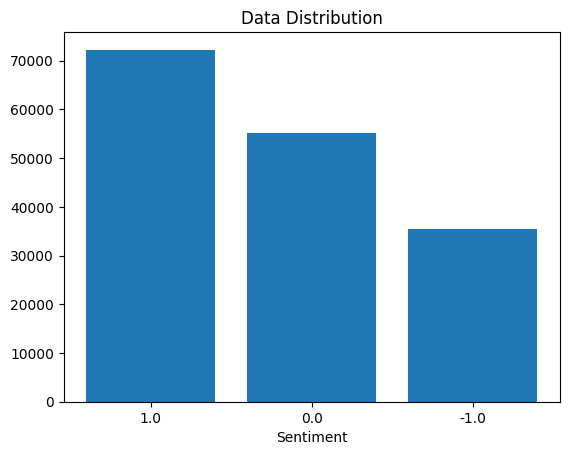

In [6]:
category_counts = df['sentiments'].value_counts()

plt.bar([str(i) for i in category_counts.keys()], category_counts.values)
plt.title("Data Distribution")
plt.xlabel("Sentiment")
plt.show()

### Data Preprocessing

In [7]:
punctuations = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~“”'
def preProcessing(text):
    text = text.translate(str.maketrans('', '', punctuations))
    text = text.lower()
    return text

df['tweets'] = df['tweets'].apply(preProcessing)

### Train Test Splitting

In [8]:
[x_train, x_test, y_train, y_test] = train_test_split(df['tweets'], df['sentiments'], test_size=0.01, random_state=19) 

### Checking Words Frequency & Creating Vocabulary 

<AxesSubplot:>

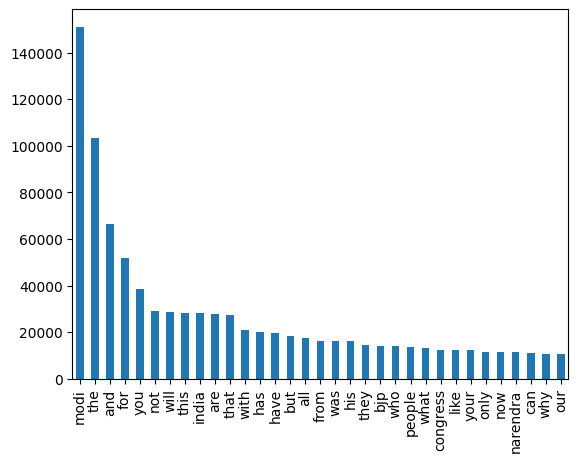

In [9]:
all_words = pd.Series(x_train).str.cat(sep=' ')
all_words = pd.Series(all_words.split())

vocab_df = all_words.value_counts()
vocab_df[vocab_df > 10000].plot(kind='bar')

In [10]:
min_freq = 20
max_freq = 30000

# creating vocabulary for training data with words having freq between min_freq and max_freq
vocab = vocab_df[(vocab_df > min_freq) & (vocab_df < max_freq)].index

# mapping each word in vocabulary to unique index
vocab_dict = dict(zip(vocab, np.arange(len(vocab))))

### Vectorization of Tweets Using Bag of Words

In [11]:
# function to create sparse matrix of given tweets
def count_vectorizer(series_tweets):
    series_tweets = list(series_tweets)
    data_indx = []
    row_indx = []
    col_indx = []
    for i in range(len(series_tweets)):
        words = set(series_tweets[i].split())
        for word in words:
            if word in vocab:
                data_indx.append(1)
                row_indx.append(i)
                col_indx.append(vocab_dict.get(word))
    sparseMatrix = csr_matrix((data_indx, (row_indx, col_indx)), shape=(len(series_tweets),len(vocab_dict)))
    return sparseMatrix

In [12]:
# vectorizing training and testing tweet data
x_train_csr = count_vectorizer(x_train)
x_test_csr = count_vectorizer(x_test)

### Logistic Regression Model Training & Predicting

In [13]:
lr = LogisticRegression(max_iter=10000).fit(x_train_csr, y_train)
lr_pred = lr.predict(x_test_csr)

print('Accuracy with LogisticRegression:', accuracy_score(y_test, lr_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, lr_pred))

Accuracy with LogisticRegression: 0.9515337423312883
Confusion Matrix:
 [[347  13  21]
 [  4 527   5]
 [ 26  10 677]]


In [14]:
# function to predict given tweets sentiment
sentiment = {-1:"Negative", 0:"Neutral", 1:"Positive"} 
def predict(tweet):
    tweet = [preProcessing(tweet)]
    return sentiment.get(lr.predict(count_vectorizer(tweet))[0])

In [16]:
# predicting sentiment of users input
while True:
    tweet = input('Enter Tweet')
    prediction = predict(tweet)
    print(f"Tweet is {prediction}")

Tweet is Neutral
Tweet is Neutral
Tweet is Neutral
Tweet is Neutral
Tweet is Neutral
Tweet is Negative
